## Data Cleaning
## Feature Scalling
## Data Preprocessing in python

In [16]:
from sklearn.impute import SimpleImputer
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv('/home/melaku/ML_1/archive/ai_human_content_detection_dataset.csv')
df.head()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1


In [3]:
round((df.isnull().sum()/df.shape[0])*100,2)

text_content            0.00
content_type            0.00
word_count              0.00
character_count         0.00
sentence_count          0.00
lexical_diversity       0.00
avg_sentence_length     0.00
avg_word_length         0.00
punctuation_ratio       0.00
flesch_reading_ease     5.78
gunning_fog_index       2.56
grammar_errors          0.00
passive_voice_ratio     2.27
predictability_score    0.00
burstiness              0.00
sentiment_score         3.95
label                   0.00
dtype: float64

In [4]:
num_col = df.select_dtypes(include = ['number']).columns
print('Numerical Columns:', num_col)
cat_col = df.select_dtypes(include = ['object']).columns
print('Catagorical Columns:', cat_col)

Numerical Columns: Index(['word_count', 'character_count', 'sentence_count', 'lexical_diversity',
       'avg_sentence_length', 'avg_word_length', 'punctuation_ratio',
       'flesch_reading_ease', 'gunning_fog_index', 'grammar_errors',
       'passive_voice_ratio', 'predictability_score', 'burstiness',
       'sentiment_score', 'label'],
      dtype='object')
Catagorical Columns: Index(['text_content', 'content_type'], dtype='object')


In [5]:
 num_col.shape

(15,)

In [6]:
cat_col.shape

(2,)

In [7]:
# Handling missing value 
imputer_1 = SimpleImputer(strategy = 'mean')
df[num_col] =imputer_1.fit_transform(df[num_col]) 
imputer_2 = SimpleImputer(strategy = 'most_frequent')
df[cat_col] = imputer_2.fit_transform(df[cat_col])
df.head(50)

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288.0,1927.0,54.0,0.9514,5.33,5.69,0.0280,53.080000,7.41,1.0,0.104100,105.86,0.5531,0.203400,1.0
1,Board its rock. Job worker break tonight coupl...,essay,253.0,1719.0,45.0,0.9723,5.62,5.80,0.0262,50.320000,8.10,6.0,0.204500,100.29,0.5643,0.485400,1.0
2,Way debate decision produce. Dream necessary c...,academic_paper,420.0,2849.0,75.0,0.9071,5.60,5.79,0.0263,46.860000,7.86,5.0,0.230800,96.88,0.4979,-0.236900,1.0
3,Story turn because such during open model. Tha...,creative_writing,196.0,1310.0,34.0,0.9592,5.76,5.69,0.0260,53.800000,7.00,2.0,0.191200,88.79,0.6241,-0.007997,1.0
4,Place specific as simply leader fall analysis....,news_article,160.0,1115.0,28.0,0.9688,5.71,5.97,0.0251,44.530000,8.29,0.0,0.131800,26.15,0.2894,-0.007997,1.0
5,Spend value return couple. Marriage method mat...,blog_post,198.0,1383.0,37.0,0.9596,5.35,5.99,0.0268,43.310000,6.99,0.0,0.087100,36.96,0.2328,-0.275500,1.0
6,Land region back nor article natural measure. ...,blog_post,84.0,551.0,15.0,0.9762,5.60,5.57,0.0272,61.160000,6.53,2.0,0.098800,53.49,0.5580,0.950500,1.0
7,Support feeling remain south trip. Include ind...,article,89.0,630.0,16.0,0.9551,5.56,6.09,0.0254,45.300000,7.62,0.0,0.134200,23.89,0.3973,-0.958900,1.0
8,Some bad where learn during. Feel stock ball y...,article,156.0,1020.0,29.0,0.9423,5.38,5.54,0.0284,62.000000,7.02,1.0,0.217900,24.83,0.1252,0.048000,1.0
9,Miss give best reveal laugh. Feel special boy ...,essay,147.0,1021.0,26.0,0.9388,5.65,5.95,0.0255,38.800000,9.06,3.0,0.126900,93.50,0.7783,-0.654100,1.0


In [8]:
df.isnull().sum()

text_content            0
content_type            0
word_count              0
character_count         0
sentence_count          0
lexical_diversity       0
avg_sentence_length     0
avg_word_length         0
punctuation_ratio       0
flesch_reading_ease     0
gunning_fog_index       0
grammar_errors          0
passive_voice_ratio     0
predictability_score    0
burstiness              0
sentiment_score         0
label                   0
dtype: int64

In [9]:
label_encoder = LabelEncoder()
for col in cat_col:
    df[col]= label_encoder.fit_transform(df[col])
    
df.head()


,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,995,0,288.0,1927.0,54.0,0.9514,5.33,5.69,0.0280,53.08,7.41,1.0,0.1041,105.86,0.5531,0.203400,1.0
1,124,4,253.0,1719.0,45.0,0.9723,5.62,5.80,0.0262,50.32,8.10,6.0,0.2045,100.29,0.5643,0.485400,1.0
2,1301,0,420.0,2849.0,75.0,0.9071,5.60,5.79,0.0263,46.86,7.86,5.0,0.2308,96.88,0.4979,-0.236900,1.0
3,1151,3,196.0,1310.0,34.0,0.9592,5.76,5.69,0.0260,53.80,7.00,2.0,0.1912,88.79,0.6241,-0.007997,1.0
4,835,5,160.0,1115.0,28.0,0.9688,5.71,5.97,0.0251,44.53,8.29,0.0,0.1318,26.15,0.2894,-0.007997,1.0


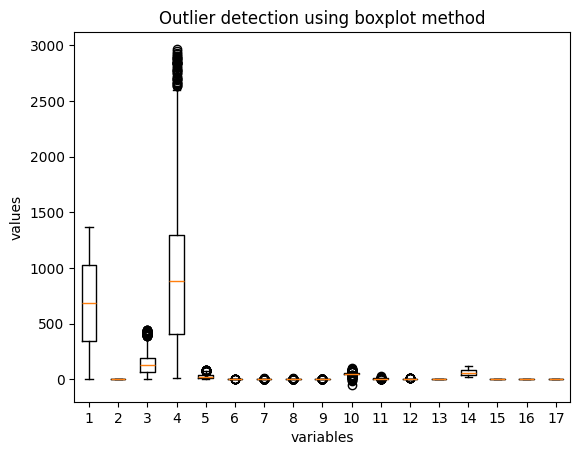

In [10]:
# Outlier detection
# box method
plt.boxplot(df)
plt.xlabel('variables')
plt.ylabel('values')
plt.title('Outlier detection using boxplot method')
plt.show()

In [31]:
# standardaization method(Z-score)
z_score = df.apply(zscore)
threshold = 3
outlier_mask = (np.abs(z_score) > threshold).any(axis=1)
outliers = df[outlier_mask]
df_clean = df[~outlier_mask]
print(df_clean)

      text_content  content_type  word_count  character_count  sentence_count  \
0              995             0       288.0           1927.0            54.0   
1              124             4       253.0           1719.0            45.0   
2             1301             0       420.0           2849.0            75.0   
3             1151             3       196.0           1310.0            34.0   
4              835             5       160.0           1115.0            28.0   
...            ...           ...         ...              ...             ...   
1362           227             0       251.0           1677.0            44.0   
1363           601             1        79.0            503.0            15.0   
1364          1220             7        15.0             94.0             3.0   
1365           869             2        92.0            578.0            14.0   
1366           108             2       192.0           1270.0            34.0   

      lexical_diversity  av

In [30]:
# IsolationForest method
clf = IsolationForest(n_estimators = 100, contamination = 0.1, random_state = 42)
clf.fit(df)
prediction = clf.predict(df)
scores = clf.decision_function(df)
print(scores)
print(prediction)
outliers = df[prediction == -1]
inlier = df[prediction == 1]
print('Inlier raw')
print(inlier)

/home/melaku/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


[ 0.05148113  0.04530727 -0.0423078  ...  0.0246917   0.03161738
  0.06014462]
[ 1  1 -1 ...  1  1  1]
Inlier raw
      text_content  content_type  word_count  character_count  sentence_count  \
0              995             0       288.0           1927.0            54.0   
1              124             4       253.0           1719.0            45.0   
3             1151             3       196.0           1310.0            34.0   
4              835             5       160.0           1115.0            28.0   
5             1115             2       198.0           1383.0            37.0   
...            ...           ...         ...              ...             ...   
1362           227             0       251.0           1677.0            44.0   
1363           601             1        79.0            503.0            15.0   
1364          1220             7        15.0             94.0             3.0   
1365           869             2        92.0            578.0            14.

In [39]:
# Inter quartiel Range
outlier_counts = {}
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
print(lower)
print(upper)

print(pd.Series(outlier_counts))

-1.5
2.5
Series([], dtype: float64)


/tmp/ipykernel_5347/331410537.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  print(pd.Series(outlier_counts))
